In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2: Quantisation of different signals, SNR

a) Generate a signal vector xSine that contains a discrete-time, zero-mean sine signal
$x[k] = A · sin(Ω k)$ with normalised discrete-time angular frequency $Ω = 2πf/fs =2π / 50$ and a variance $σ^2_x = 1/2$ (as a time average measure) for $0 ≤ k < 50000$. 

In [2]:
k = np.arange(0, 50000)
A = 1
Om = 2*np.pi / 50
var_sine = 1/2
xSine = A * np.sin(Om * k)

b) Generate a signal vector $xNorm$ that contains a discrete-time, zero-mean, normally distributed noise signal (randn()) with a variance $σ^2_x = 0.0471$ for $0 ≤ k < 50000$. By doing so the signal amplitudes are mostly within the range $−1 ≤ xNorm ≤ 1$ and theo-
retically only 1 sample out of 100,000 samples has a larger amplitude $|xNorm| > 1$ that would clip the quantiser modeled in exercise 1

In [3]:
var_norm = 0.0471
xNorm = var_norm * np.random.randn(50000)

c) Generate a signal vector xUniform that contains a discrete-time, zero-mean, uniformly distributed noise signal (rand()) with a variance $σ^2_x =1/3$ for $0 ≤ k < 50000$. By doing so the signal amplitudes are theoretically within the range $−1 ≤ xUniform ≤ 1$

In [4]:
var_uniform = 1/3
xUniform = var_uniform * np.random.rand(50000)

d) Generate a signal vector $xLaplace$ that contains a discrete-time, zero-mean, noise signal following the Laplace distribution (laprnd()
) with a variance $σ^2_x = 0.0236$ for $0 ≤ k < 50000$.

In [1]:
import laprnd
var_lap = 0.0236

xLaplace = laprnd.laprnd(50000, sigma=var_lap)

e) Generate fig. 2: apply the 4 generated signals to the quantisation with xq = my_quant(x,N) from exercise 1 for different numbers of bits and calculate the signal-to-noise ratio in dB as ...
using the quantisation error signal $e[k] = xq[k]−x[k]$. Note that your simulation results for the noise signals may differ depending on the state of the used random number generator (i.e. how many samples have amplitudes $|x[k]| > 1$). To validate your code use the sine signal as reference. Then compare your results with the theoretical SNRs:

    • zero-mean, uniformly distributed with $σ^2_x = 1/3$: SNRdB = 6.02 dB · w

    • zero-mean, full scale sine signal with $σ^2_x = 1/2$: SNRdB = 6.02 dB · w + 1.76 dB

    • zero-mean, normally distributed noise with $σ^2_x = 0.0471$: SNRdB = 6.02 dB · w − 8.5 dB
    
    • zero-mean, Laplace distributed noise with $σ^2_x = 0.0236$: SNRdB = 6.02 dB · w − 9 dB


In [6]:
def my_quant(x,N):
    #limit
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    
    #quantization
    Q = 2/(N-1) #quantization Stepsize    
    xQ = Q * np.floor(x/Q + 1/2)
    return xQ

def my_quant_even(x,N):
    #limit
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    
    
    #quantization
    Q = 2/N #quantization Stepsize
    xQ = Q * np.floor(x/Q + 1/2)
    #increase last quantisation step
    iqdx = np.where(x > (1-Q))
    xQ[iqdx] = 1-Q
    
    return xQ

In [7]:
def calcSNR(x, xQ, varX):
    e = xQ - x
    varE = np.var(e) 
    SNR = 10 * np.log10(varX/varE)
    #SNR = 10 * np.log10((np.var(x)/varE))
    return SNR

In [8]:
def quantize_SNR_For_N_Steps(x, N, varX):
    #select Quantization function
    
    if N%2 == 0:
        xQ = my_quant_even(x,N)
    else:
        xQ = my_quant(x,N)
    
    #return SNR
    return calcSNR(x, xQ, varX)

In [9]:
def plot_SNR(w, sim_plot, theo_plot, titel):
    plt.figure(figsize=(6,6))
    plt.plot(w, theo_plot, label=r'theoretical')
    plt.plot(w, sim_plot, label=r'simulation')
    plt.xlabel(r'number of bits')
    plt.ylabel(r'SNR / dB')
    plt.grid()
    plt.legend()
    plt.title(titel)

In [10]:
#max_Steps=1048576
max_Bits = 19
w = np.arange(2,max_Bits+1,1)

#theoretical signals
theory_sin_snr = 6.02 * w + 1.79
theory_uniform_snr = 6.02 * w
theory_norm_snr = 6.02 * w - 8.5
theory_lap_snr = 6.02 *w - 9

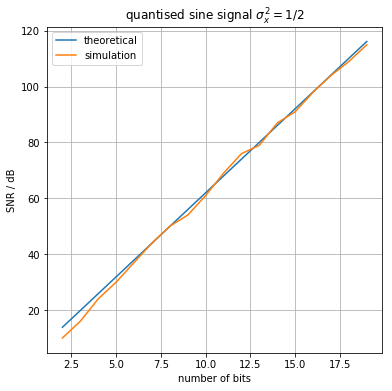

In [11]:
#Sine
sin_snr = np.arange(2,max_Bits+1)
for n in range(2,max_Bits+1):
    sin_snr[n-2] = quantize_SNR_For_N_Steps(xSine, np.power(2,n), var_sine)
plot_SNR(w, sin_snr, theory_sin_snr, r'quantised sine signal $\sigma^2_x = 1/2$')

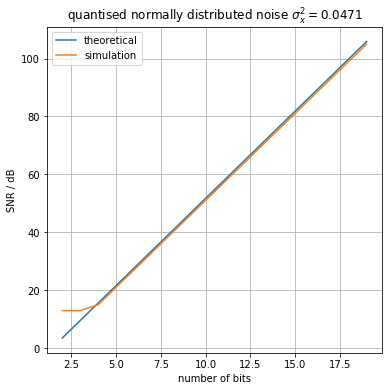

In [12]:
#Normal Distributed    
norm_snr = np.arange(2,max_Bits+1)
for n in range(2,max_Bits+1):
    norm_snr[n-2] = quantize_SNR_For_N_Steps(xNorm, np.power(2,n), var_norm)
plot_SNR(w, norm_snr, theory_norm_snr, r'quantised normally distributed noise $\sigma^2_x = 0.0471$')


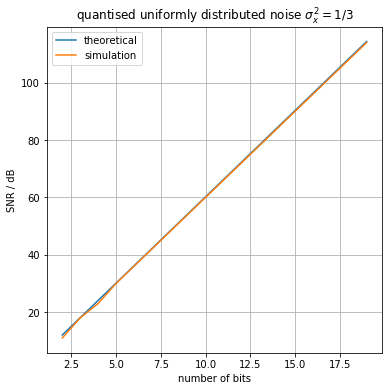

In [13]:
#Uniformly Distributed
uniform_snr = np.arange(2,max_Bits+1)
for n in range(2,max_Bits+1):
    uniform_snr[n-2] = quantize_SNR_For_N_Steps(xUniform, np.power(2,n), var_uniform)

plot_SNR(w, uniform_snr, theory_uniform_snr, r'quantised uniformly distributed noise $\sigma^2_x = 1/3$')
    

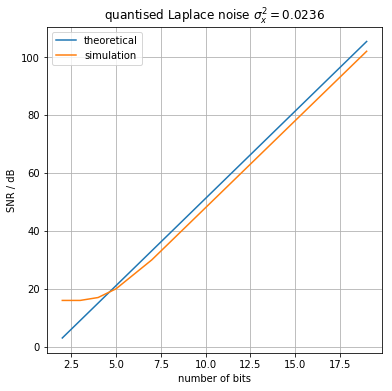

In [14]:
#Laplace
lap_snr = np.arange(2,max_Bits+1)
for n in range(2,max_Bits+1):
    lap_snr[n-2] = quantize_SNR_For_N_Steps(xLaplace, np.power(2,n), var_lap)
    
plot_SNR(w, lap_snr, theory_lap_snr, r'quantised Laplace noise $\sigma^2_x = 0.0236$')

Abweichungen zur Lösung konnten nicht gefunden werden. Vermutung: übersetze Larplace Funktion funktioniert nicht richtig.